In [52]:
import os
import PIL
import cv2
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers  import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [53]:
!pwd

/home/saurav/Documents/transfer_learning


In [54]:
data_dir = "./flower_photos"
CATEGORIES = os.listdir(data_dir)

In [55]:
print(CATEGORIES)

['sunflowers', 'dandelion', 'daisy', 'tulips', 'roses']


In [87]:
img_array.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [57]:
#print(img_array)
print(img_array.size)

204480


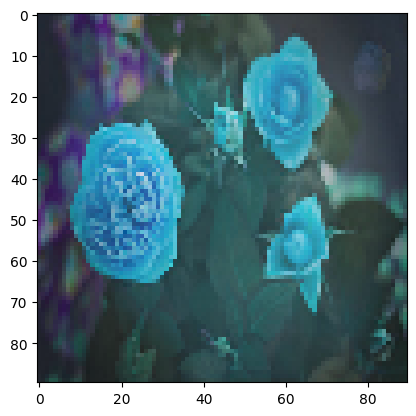

In [58]:
#correcting the size of the images
img_size = 90

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array)
plt.show()

In [59]:
training_data = []
img_size=90
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(data_dir, category)        #move us through the different directories of datasets
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()
    

In [60]:
print(len(training_data))

3670


In [93]:
training_data[1]

[array([[[ 29,  44,  15],
         [ 27,  43,  13],
         [ 23,  39,  12],
         ...,
         [ 11,   6,   7],
         [ 12,   6,   5],
         [ 16,   5,   7]],
 
        [[ 29,  42,  14],
         [ 21,  41,  10],
         [ 24,  38,  12],
         ...,
         [ 12,   7,   8],
         [  8,   2,   3],
         [ 14,   3,   5]],
 
        [[ 31,  47,  14],
         [ 32,  44,  21],
         [ 29,  41,  12],
         ...,
         [ 12,   4,   6],
         [ 11,   6,   7],
         [ 17,   5,   6]],
 
        ...,
 
        [[  2,  99, 142],
         [  2,  92, 136],
         [  3,  92, 133],
         ...,
         [  0, 204, 234],
         [  1, 208, 234],
         [  3, 206, 232]],
 
        [[  0,  90, 136],
         [  5,  92, 137],
         [  2,  97, 136],
         ...,
         [  0, 206, 233],
         [  0, 204, 230],
         [  2, 210, 230]],
 
        [[  0,  91, 136],
         [  2,  96, 140],
         [  4, 156, 188],
         ...,
         [  1, 208, 234],
  

In [62]:
#shuffling the data
random.shuffle(training_data)

In [98]:
#checking if the training data is shuffled well
for sample in training_data:
    print(sample[1])

1
1
0
2
1
2
3
3
1
1
2
0
0
3
2
0
1
2
0
2
3
0
0
1
4
3
4
3
1
0
0
3
2
1
1
0
1
3
4
0
0
1
4
2
0
4
3
3
1
0
2
3
1
2
4
0
1
1
2
0
0
3
3
0
2
3
1
4
3
3
3
3
1
1
1
0
0
2
0
2
0
0
3
2
2
0
3
4
4
3
0
4
3
0
2
3
2
1
3
1
4
0
1
2
3
2
2
0
0
2
0
4
2
0
0
1
3
0
3
3
1
4
3
2
0
3
3
1
1
1
4
4
2
2
1
1
1
2
0
1
3
1
2
0
0
3
1
0
0
1
0
0
3
0
1
1
3
4
4
0
2
2
4
0
2
0
1
4
1
1
0
1
3
2
4
3
0
2
1
1
2
4
2
0
4
1
4
4
3
0
3
0
1
0
2
2
3
0
0
1
4
4
4
1
2
3
4
2
3
4
0
1
3
0
2
1
2
3
1
1
4
0
1
1
1
4
0
3
3
4
4
4
0
2
3
1
3
4
4
2
1
4
2
3
2
0
2
3
3
4
3
4
2
0
0
1
0
4
0
4
3
2
3
1
2
0
1
4
1
4
0
1
0
1
0
1
4
0
3
0
4
4
4
1
2
3
0
1
1
3
3
3
0
0
2
1
0
2
3
1
2
3
3
1
0
0
4
2
0
3
3
4
3
0
2
1
3
3
3
1
4
3
2
4
3
0
1
2
3
4
4
0
1
4
3
3
4
3
2
3
3
1
1
0
3
3
3
1
1
3
2
1
2
2
0
1
1
4
4
1
0
1
3
4
4
4
0
3
2
3
0
3
1
3
2
3
4
0
2
2
1
0
4
0
4
1
4
2
0
3
3
2
0
2
2
2
0
1
0
1
0
0
0
1
2
4
3
2
2
1
1
4
1
0
1
1
0
2
2
1
0
4
1
3
0
4
4
3
4
3
0
4
3
0
2
3
0
3
0
1
4
2
1
0
4
2
3
1
4
1
1
1
3
4
1
4
2
2
0
0
1
4
4
1
4
2
3
4
2
4
4
4
3
1
1
0
1
0
0
2
3
4
2
4
1
4
4
4
2
4
4
4
0
1
3
4
4
1
4
0


In [99]:
batch_size=10
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, 
                                                              subset = "validation",
                                                              seed=123,
                                                              batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [100]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.imshow

['sunflowers', 'dandelion', 'daisy', 'tulips', 'roses']